# Post-Evaluation Questionnaire Analysis (Individual)

## 1. Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


group_path = "Post-Evaluation (French - Group)(1-24).xlsx"
indiv_path = "Post-Evaluation (French - Individual) (1-5).xlsx"
group_df = pd.read_excel(group_path)
indiv_df = pd.read_excel(indiv_path)

# Standardize and combine
common_cols = set(group_df.columns).intersection(set(indiv_df.columns))
combined_df = pd.concat([group_df[list(common_cols)], indiv_df[list(common_cols)]], ignore_index=True)

# Drop completely empty rows
combined_df.dropna(how='all', inplace=True)
indiv_df.dropna(how='all', inplace=True)
group_df.dropna(how='all', inplace=True)

## 2. Clean and Prepare

In [2]:
# Drop unneeded metadata columns (except Startzeit)
meta_cols = ['ID', 'E-Mail', 'Name', 'Zeitpunkt der letzten Änderung']
df_clean = combined_df.drop(columns=meta_cols, errors='ignore')
df_clean_indiv = indiv_df.drop(columns=meta_cols, errors='ignore')
df_clean_group = group_df.drop(columns=meta_cols, errors='ignore')

# make group which started at the same time
for df in [df_clean, df_clean_group, df_clean_indiv]:
    df['Startzeit'] = pd.to_datetime(df['Startzeit'], errors='coerce')
    df['TimeGroup'] = df['Startzeit'].dt.round('15min')

# Convert to numeric
def safe_numeric(df):
    keep_cols = ['Startzeit', 'TimeGroup']
    numeric_df = df.drop(columns=[col for col in keep_cols if col in df.columns], errors='ignore')
    numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')
    return pd.concat([df[keep_cols], numeric_df], axis=1)

df_clean = safe_numeric(df_clean)
df_clean_group = safe_numeric(df_clean_group)
df_clean_indiv = df_clean_indiv.apply(pd.to_numeric, errors='coerce') 

df_clean = df_clean.dropna(thresh=5)
df_clean_indiv = df_clean_indiv.dropna(thresh=5)
df_clean_group = df_clean_group.dropna(thresh=5)


## 5. Distribution of Jefferson Scale

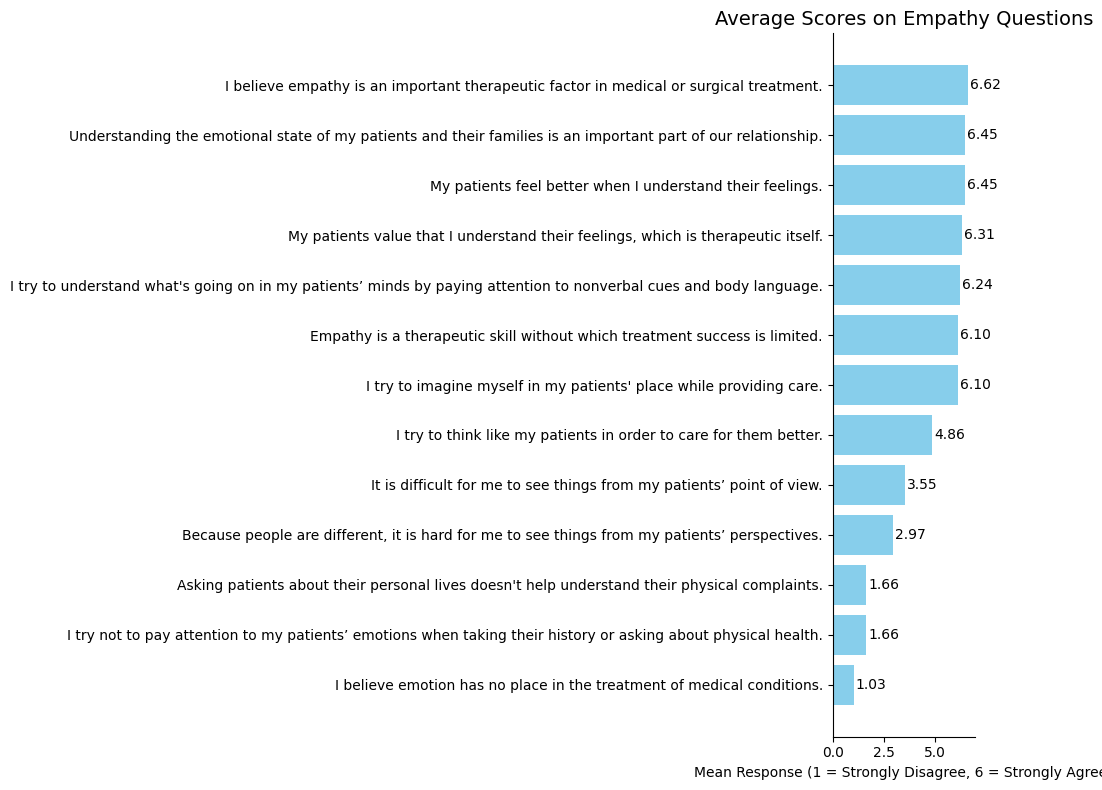

0     70
1     79
2     83
3     79
4     83
5     91
6     72
7     56
8     76
9     80
10    66
11    83
12    82
13    77
14    79
15    79
16    86
17    76
18    88
19    76
20    75
21    81
22    73
23    77
24    84
25    85
26    83
27    70
28    81
Name: Empathy Score, dtype: int64
Empathy Score Summary (out of 13 items, max = 91):
count    29.000000
mean     78.275862
std       7.065492
min      56.000000
25%      76.000000
50%      79.000000
75%      83.000000
max      91.000000
Name: Empathy Score, dtype: float64


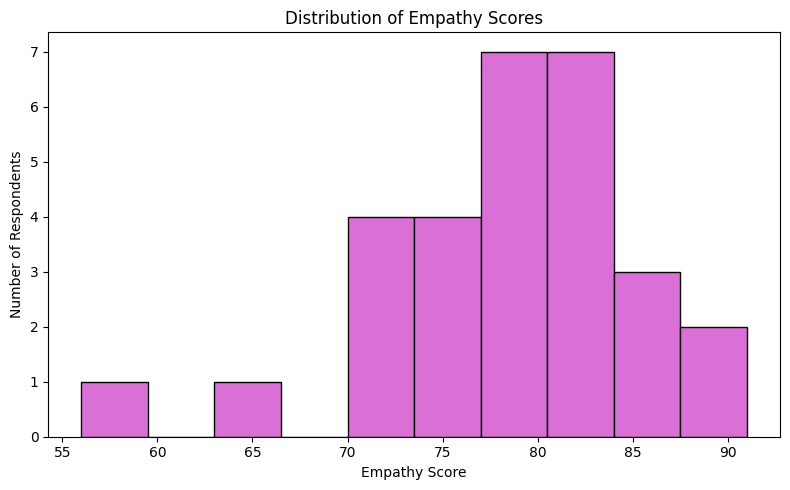

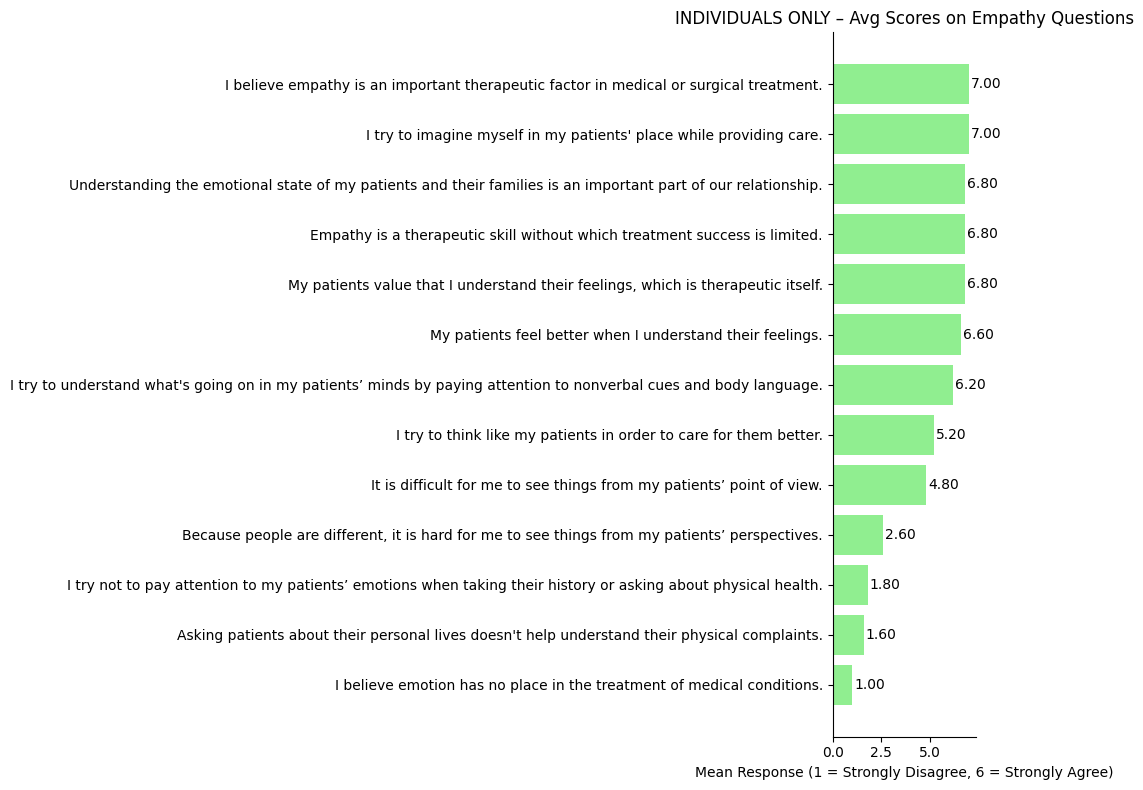


INDIVIDUALS ONLY - Empathy Score Summary:
count     5.000000
mean     80.600000
std       6.107373
min      70.000000
25%      81.000000
50%      83.000000
75%      84.000000
max      85.000000
Name: Empathy Score, dtype: float64


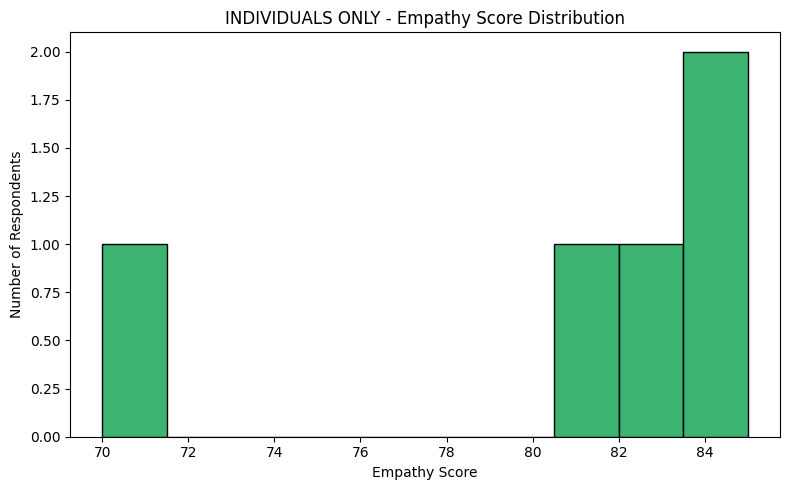

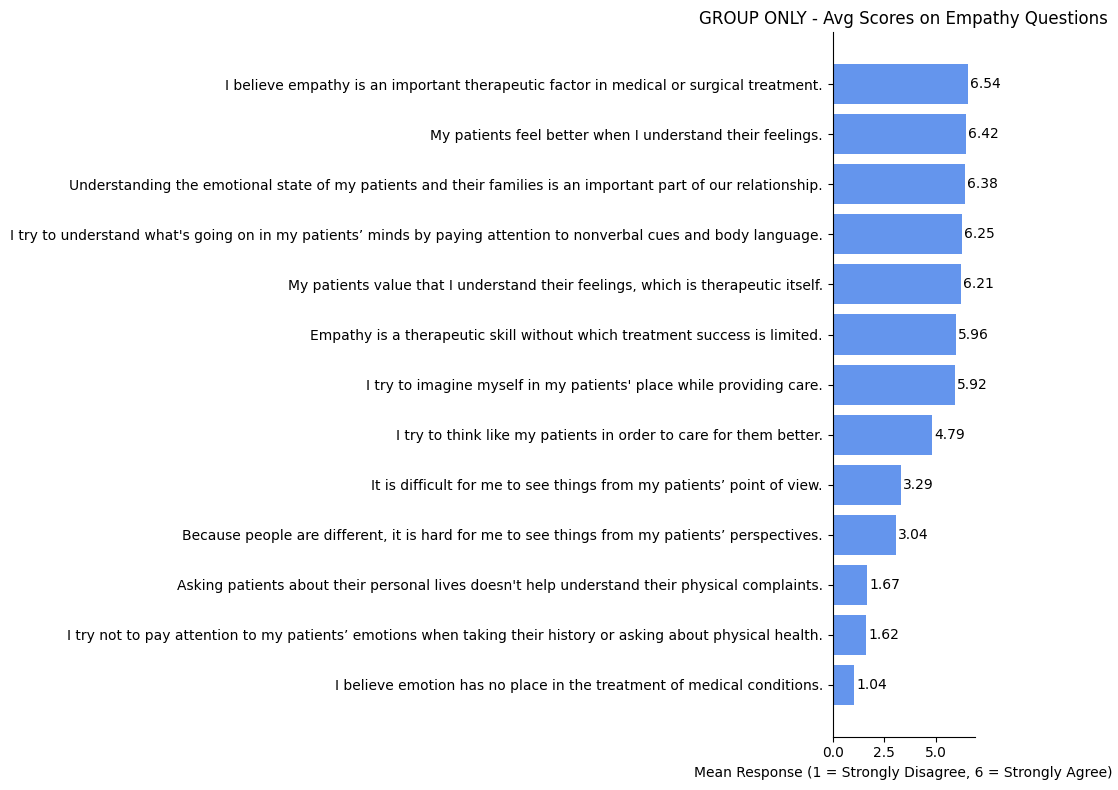


GROUP ONLY - Empathy Score Summary:
count    24.000000
mean     77.791667
std       7.271021
min      56.000000
25%      75.750000
50%      79.000000
75%      82.250000
max      91.000000
Name: Empathy Score, dtype: float64


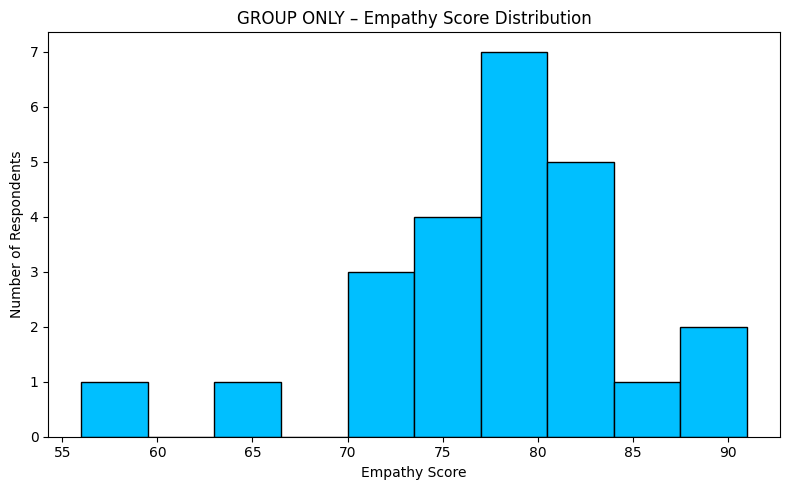

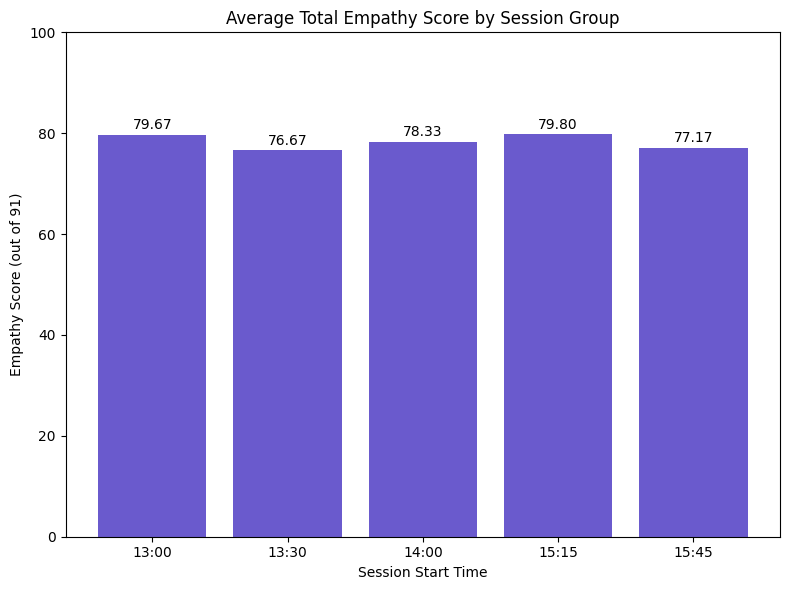

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# all questions
french_questions = [
    'Mes patients se sentent mieux lorsque je comprends leurs sentiments.',
    "Il m'est difficile d'envisager les choses du point de vue de mes patients.",
    "Parce que les gens sont différents, il m'est difficile de voir les choses du point de vue de mes patients.",
    "J'essaie de ne pas prêter attention aux émotions de mes patients lorsque je recueille leurs antécédents ou que je leur pose des questions sur leur santé physique.",
    "J'essaie de m'imaginer à la place de mes patients lorsque je leur prodigue des soins.",
    'Mes patients apprécient que je comprenne leurs sentiments, ce qui est thérapeutique en soi.',
    "Demander aux patients ce qui se passe dans leur vie personnelle n'aide pas à comprendre leurs plaintes physiques.",
    "J'essaie de comprendre ce qui se passe dans l'esprit de mes patients en prêtant attention à leurs signaux non verbaux et à leur langage corporel.",
    "Je pense que l'émotion n'a pas sa place dans le traitement des maladies médicales.",
    "L'empathie est une compétence thérapeutique sans laquelle le succès du traitement est limité.",
    'Un élément important de la relation avec mes patients est ma compréhension de leur état émotionnel et de celui de leur famille.',
    "J'essaie de penser comme mes patients afin de mieux les soigner.",
    "Je pense que l'empathie est un facteur thérapeutique important dans le cadre d'un traitement médical ou chirurgical."
]

english_questions = [
    "My patients feel better when I understand their feelings.",
    "It is difficult for me to see things from my patients’ point of view.",
    "Because people are different, it is hard for me to see things from my patients’ perspectives.",
    "I try not to pay attention to my patients’ emotions when taking their history or asking about physical health.",
    "I try to imagine myself in my patients' place while providing care.",
    "My patients value that I understand their feelings, which is therapeutic itself.",
    "Asking patients about their personal lives doesn't help understand their physical complaints.",
    "I try to understand what's going on in my patients’ minds by paying attention to nonverbal cues and body language.",
    "I believe emotion has no place in the treatment of medical conditions.",
    "Empathy is a therapeutic skill without which treatment success is limited.",
    "Understanding the emotional state of my patients and their families is an important part of our relationship.",
    "I try to think like my patients in order to care for them better.",
    "I believe empathy is an important therapeutic factor in medical or surgical treatment."
]

question_map = dict(zip(french_questions, english_questions))
df_renamed = df_clean.rename(columns=question_map)
df_renamed_indiv = df_clean_indiv.rename(columns=question_map)
df_renamed_group = df_clean_group.rename(columns=question_map)

# Select and clean 
df_attitudes = df_renamed[english_questions].apply(pd.to_numeric, errors='coerce')
df_attitudes = df_attitudes.dropna(thresh=5)


# PLOT 1: Avg Scores
mean_scores = df_attitudes.mean().sort_values()
plt.figure(figsize=(10, 8))
bars = plt.barh(mean_scores.index, mean_scores.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1,
             bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}",
             va='center', ha='left', fontsize=10)

plt.title("Average Scores on Empathy Questions", fontsize=14)
plt.xlabel("Mean Response (1 = Strongly Disagree, 6 = Strongly Agree)")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()


# PLOT 2: Empathy Scores

#  Reverse-score 
def reverse_score(series):
    return series.map({1: 7, 2: 6, 3: 5, 4: 4, 5: 3, 6: 2, 7: 1})

# Questions to reverse
reverse_items = [
    "It is difficult for me to see things from my patients’ point of view.",
    "Because people are different, it is hard for me to see things from my patients’ perspectives.",
    "I try not to pay attention to my patients’ emotions when taking their history or asking about physical health.",
    "Asking patients about their personal lives doesn't help understand their physical complaints.",
    "I believe emotion has no place in the treatment of medical conditions."
]

df_empathy_scored = df_attitudes.copy()
for col in reverse_items:
    df_empathy_scored[col] = reverse_score(df_empathy_scored[col])

# Sum the empathy scores
df_empathy_scored["Empathy Score"] = df_empathy_scored.sum(axis=1)
print(df_empathy_scored["Empathy Score"].reset_index(drop=True))
print("Empathy Score Summary (out of 13 items, max = 91):")
print(df_empathy_scored["Empathy Score"].describe())

# Plot 
plt.figure(figsize=(8, 5))
df_empathy_scored["Empathy Score"].plot(kind='hist', bins=10, color='orchid', edgecolor='black')
plt.title("Distribution of Empathy Scores")
plt.xlabel("Empathy Score")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()


# PLOT 3: Individuals Empathy Plots items

df_attitudes_indiv = df_renamed_indiv[english_questions].apply(pd.to_numeric, errors='coerce')
df_attitudes_indiv = df_attitudes_indiv.dropna(thresh=5)
mean_scores_indiv = df_attitudes_indiv.mean().sort_values()

plt.figure(figsize=(10, 8))
bars = plt.barh(mean_scores_indiv.index, mean_scores_indiv.values, color='lightgreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1,
             bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}",
             va='center', ha='left', fontsize=10)

plt.title("INDIVIDUALS ONLY – Avg Scores on Empathy Questions")
plt.xlabel("Mean Response (1 = Strongly Disagree, 6 = Strongly Agree)")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

# PLOT 4: Individual Empathy Score Distribution

df_empathy_indiv = df_attitudes_indiv.copy()
for col in reverse_items:
    df_empathy_indiv[col] = reverse_score(df_empathy_indiv[col])

# Compute total empathy score
df_empathy_indiv["Empathy Score"] = df_empathy_indiv.sum(axis=1)

print("\nINDIVIDUALS ONLY - Empathy Score Summary:")
print(df_empathy_indiv["Empathy Score"].describe())

# Plot 
plt.figure(figsize=(8, 5))
df_empathy_indiv["Empathy Score"].plot(kind='hist', bins=10, color='mediumseagreen', edgecolor='black')
plt.title("INDIVIDUALS ONLY - Empathy Score Distribution")
plt.xlabel("Empathy Score")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()


# PLOT 5: Group Empathy Plots items

df_attitudes_group = df_renamed_group[english_questions].apply(pd.to_numeric, errors='coerce')
df_attitudes_group = df_attitudes_group.dropna(thresh=5)
mean_scores_group = df_attitudes_group.mean().sort_values()

plt.figure(figsize=(10, 8))
bars = plt.barh(mean_scores_group.index, mean_scores_group.values, color='cornflowerblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1,
             bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}",
             va='center', ha='left', fontsize=10)

plt.title("GROUP ONLY - Avg Scores on Empathy Questions")
plt.xlabel("Mean Response (1 = Strongly Disagree, 6 = Strongly Agree)")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

# PLOT 6: Group Empathy Score Distribution 

df_empathy_group = df_attitudes_group.copy()
for col in reverse_items:
    df_empathy_group[col] = reverse_score(df_empathy_group[col])

# Total empathy score
df_empathy_group["Empathy Score"] = df_empathy_group.sum(axis=1)

print("\nGROUP ONLY - Empathy Score Summary:")
print(df_empathy_group["Empathy Score"].describe())

# Plot
plt.figure(figsize=(8, 5))
df_empathy_group["Empathy Score"].plot(kind='hist', bins=10, color='deepskyblue', edgecolor='black')
plt.title("GROUP ONLY – Empathy Score Distribution")
plt.xlabel("Empathy Score")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()


# PLOT 7: Total Empathy Score by Session Group
# df to store total scores
score_summary = []

for group_time, group_data in df_clean.groupby('TimeGroup'):
    df_group_temp = group_data.rename(columns=question_map)
    df_empathy_temp = df_group_temp[english_questions].apply(pd.to_numeric, errors='coerce')
    
    # Reverse score
    for col in reverse_items:
        if col in df_empathy_temp.columns:
            df_empathy_temp[col] = reverse_score(df_empathy_temp[col])
    
    df_empathy_temp["Empathy Score"] = df_empathy_temp.sum(axis=1)
    # Store average per group
    avg_score = df_empathy_temp["Empathy Score"].mean()
    score_summary.append((group_time.strftime('%H:%M'), avg_score))

# Convert to df
score_df = pd.DataFrame(score_summary, columns=["TimeGroup", "Avg Empathy Score"]).set_index("TimeGroup").sort_index()

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(score_df.index, score_df["Avg Empathy Score"], color='slateblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}", ha='center', va='bottom')

plt.title("Average Total Empathy Score by Session Group")
plt.ylabel("Empathy Score (out of 91)")
plt.xlabel("Session Start Time")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()



## 6. Distribution of Perception

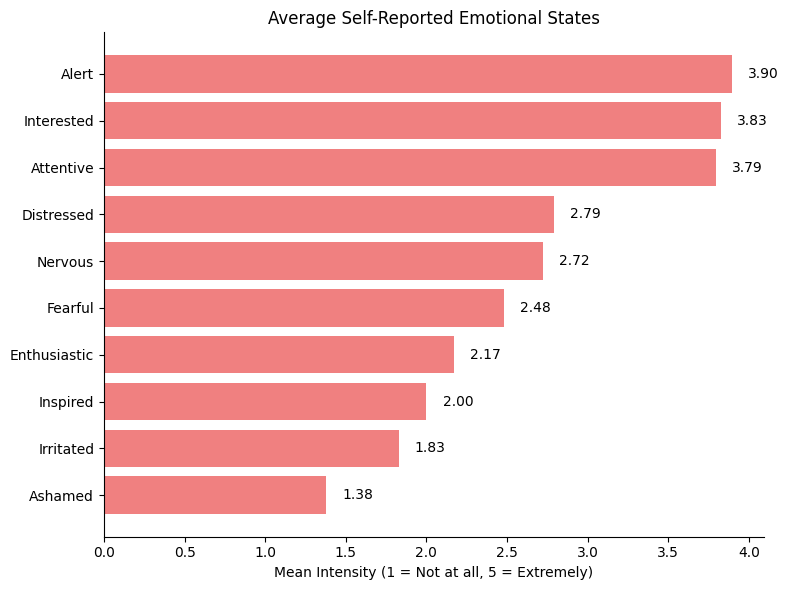

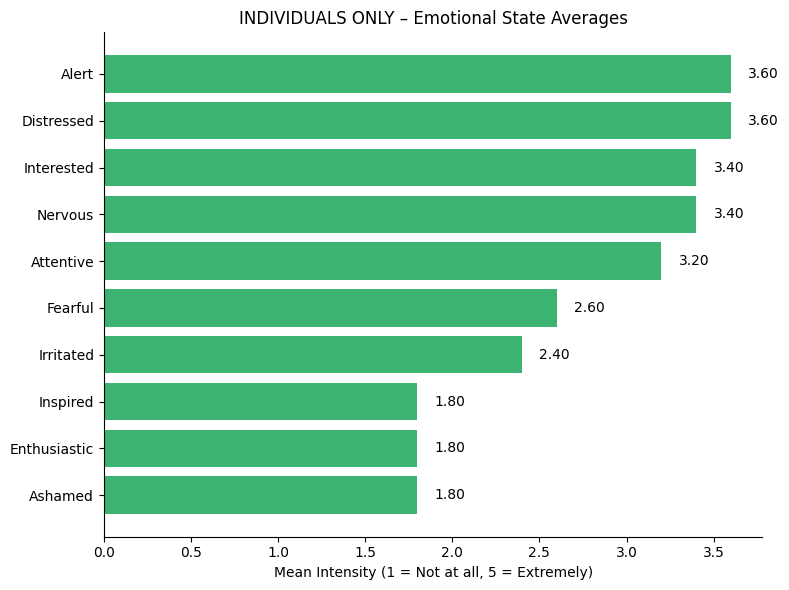

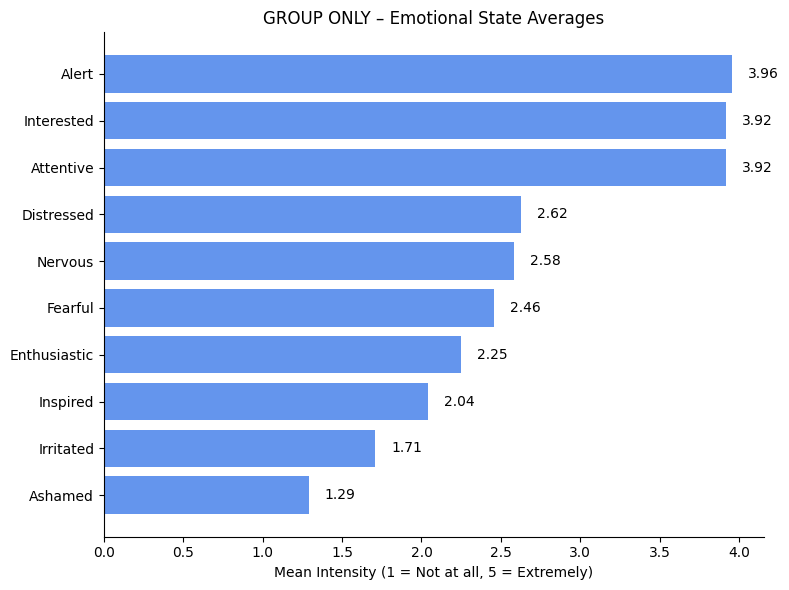

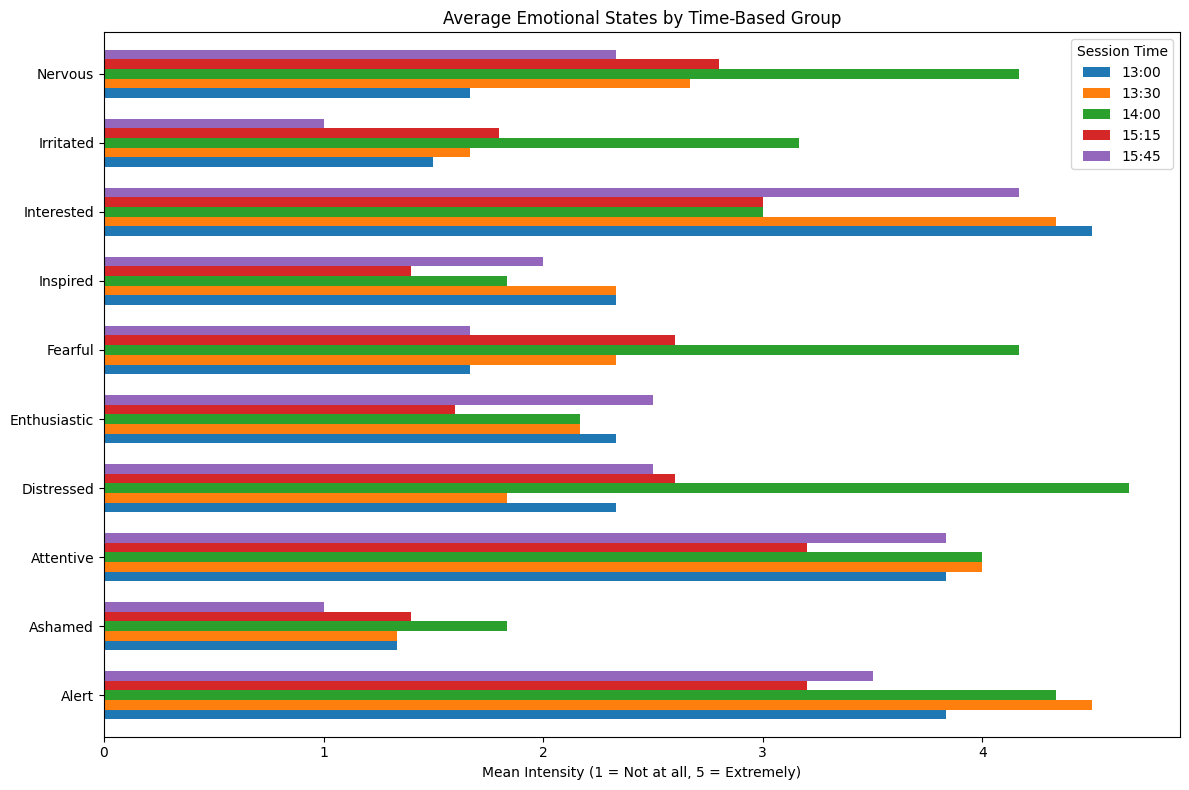

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Emotion Translation Map
emotion_map = {
    "Angoissé(e)\xa0": "Distressed",
    "Attentif(ve)": "Attentive",
    "Honteux(se)": "Ashamed",
    "Enthousiaste": "Enthusiastic",
    "Irrité(e)": "Irritated",
    "Inspiré(e)": "Inspired",
    "Nerveux(se)": "Nervous",
    "Intéressé(e)": "Interested",
    "Alerte": "Alert",
    "Craintif(ve)": "Fearful"
}

# All participants – Emotional States

df_emotions = df_clean[list(emotion_map.keys())].rename(columns=emotion_map)
df_emotions = df_emotions.apply(pd.to_numeric, errors='coerce')
emotion_means = df_emotions.mean().sort_values()

plt.figure(figsize=(8, 6))
bars = plt.barh(emotion_means.index, emotion_means.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center', ha='left')

plt.title("Average Self-Reported Emotional States")
plt.xlabel("Mean Intensity (1 = Not at all, 5 = Extremely)")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

# Individuals Emotional States
df_emotions_indiv = df_clean_indiv[list(emotion_map.keys())].rename(columns=emotion_map)
df_emotions_indiv = df_emotions_indiv.apply(pd.to_numeric, errors='coerce')
emotion_means_indiv = df_emotions_indiv.mean().sort_values()

plt.figure(figsize=(8, 6))
bars = plt.barh(emotion_means_indiv.index, emotion_means_indiv.values, color='mediumseagreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center', ha='left')

plt.title("INDIVIDUALS ONLY – Emotional State Averages")
plt.xlabel("Mean Intensity (1 = Not at all, 5 = Extremely)")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()


# Group Emotional States
df_emotions_group = df_clean_group[list(emotion_map.keys())].rename(columns=emotion_map)
df_emotions_group = df_emotions_group.apply(pd.to_numeric, errors='coerce')
emotion_means_group = df_emotions_group.mean().sort_values()

plt.figure(figsize=(8, 6))
bars = plt.barh(emotion_means_group.index, emotion_means_group.values, color='cornflowerblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center', ha='left')

plt.title("GROUP ONLY – Emotional State Averages")
plt.xlabel("Mean Intensity (1 = Not at all, 5 = Extremely)")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()


# Session Groups

df_clean['Startzeit'] = pd.to_datetime(df_clean['Startzeit'], errors='coerce')
df_clean['TimeGroup'] = df_clean['Startzeit'].dt.round('15min')

# Compute average emotional states per session group
grouped_emotions = []

for group_time, group_data in df_clean.groupby('TimeGroup'):
    emotions = group_data[list(emotion_map.keys())].rename(columns=emotion_map)
    emotions = emotions.apply(pd.to_numeric, errors='coerce')
    mean_emotions = emotions.mean()
    mean_emotions.name = group_time.strftime('%H:%M')
    grouped_emotions.append(mean_emotions)

# Combine into one df
emotion_by_group = pd.DataFrame(grouped_emotions)
emotion_by_group = emotion_by_group.T.sort_index()

emotion_by_group.plot(kind='barh', figsize=(12, 8), width=0.7)

plt.title("Average Emotional States by Time-Based Group")
plt.xlabel("Mean Intensity (1 = Not at all, 5 = Extremely)")
plt.legend(title="Session Time")
plt.tight_layout()
plt.show()


## 7. Evaluation of Simulation

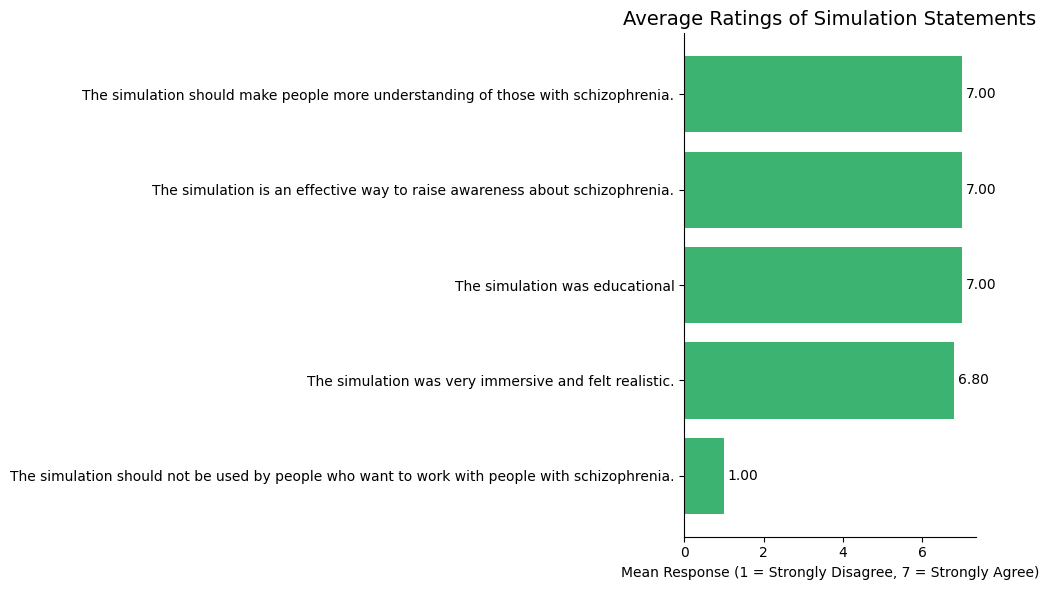

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulation Statements Translation Map
simulation_map = {
    'La simulation était éducative': "The simulation was educational",
    'La simulation est un moyen efficace de sensibiliser à la schizophrénie.':
        "The simulation is an effective way to raise awareness about schizophrenia.",
    'La simulation ne doit pas être utilisée par les personnes qui souhaitent travailler avec des personnes atteintes de schizophrénie.':
        "The simulation should not be used by people who want to work with people with schizophrenia.",
    "La simulation devrait rendre les gens plus compréhensifs à l'égard des personnes atteintes de schizophrénie.":
        "The simulation should make people more understanding of those with schizophrenia.",
    'La simulation était très immersive et donnait vraiment l’impression d’être réelle.':
        "The simulation was very immersive and felt realistic."
}

sim_df = df_clean_indiv[list(simulation_map.keys())].rename(columns=simulation_map)
sim_df = sim_df.apply(pd.to_numeric, errors='coerce')

# Calculate mean scores
sim_means = sim_df.mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(sim_means.index, sim_means.values, color='mediumseagreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}", va='center', ha='left', fontsize=10)

plt.title("Average Ratings of Simulation Statements", fontsize=14)
plt.xlabel("Mean Response (1 = Strongly Disagree, 7 = Strongly Agree)")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


## 8. Evaluation of Other Questions

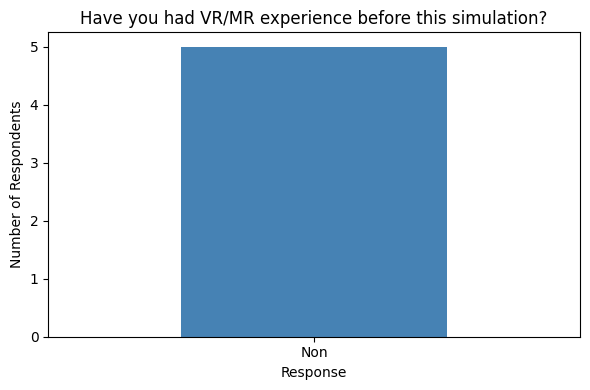

Additional Comments from Respondents:
1. Juste le calibrage des lunettes avait quelques bugg mais en soit cela m’a suffit pour m’immerger dans la pensée d’une personne schizophrène !! Merci !!!!
Translation: 1. Just the calibration of the glasses had some bugg but in itself it was enough for me to immerse myself in the thoughts of a schizophrenic person! Thanks !!!!


In [6]:
vr_column = 'Avez-vous déjà eu des expériences avec la réalité virtuelle ou mixte avant cette simulation ?'
comment_column = "Avez-vous d'autres remarques à formuler ?"

plt.figure(figsize=(6, 4))
indiv_df[vr_column].value_counts(dropna=False).plot(kind='bar', color='steelblue')
plt.title("Have you had VR/MR experience before this simulation?")
plt.xlabel("Response")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

comments = indiv_df[comment_column].dropna().astype(str)

print("Additional Comments from Respondents:")
for i, comment in enumerate(comments, 1):
    print(f"{i}. {comment.strip()}")
    print(f"Translation: 1. Just the calibration of the glasses had some bugg but in itself it was enough for me to immerse myself in the thoughts of a schizophrenic person! Thanks !!!!")
